 # k_means

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [96]:
rng = np.random.default_rng(seed = 42)
mus = np.array([[-3,3],
                [3,-3],
                [3,3]])
mus

array([[-3,  3],
       [ 3, -3],
       [ 3,  3]])

In [97]:
cov = np.eye(2)
cov

array([[1., 0.],
       [0., 1.]])

In [98]:
n = 60
xvals = [rng.multivariate_normal(mus[i] , cov , size = n//3) for i in range(3)]

In [99]:
print(len(xvals))
print(xvals)

3
[array([[-2.69528292,  1.96001589],
       [-2.2495488 ,  3.94056472],
       [-4.95103519,  1.69782049],
       [-2.8721596 ,  2.68375741],
       [-3.01680116,  2.14695607],
       [-2.12060203,  3.77779194],
       [-2.9339693 ,  4.12724121],
       [-2.53249066,  2.14070754],
       [-2.63124922,  2.0411174 ],
       [-2.1215497 ,  2.95007409],
       [-3.18486236,  2.31907046],
       [-1.77745866,  2.84547052],
       [-3.42832782,  2.64786645],
       [-2.46769081,  3.36544406],
       [-2.58726739,  3.430821  ],
       [-0.8583524 ,  2.59358498],
       [-3.51224273,  2.18622727],
       [-2.38402058,  4.12897229],
       [-3.11394746,  2.15984352],
       [-3.82448122,  3.65059279]]), array([[ 3.74325417, -2.45684573],
       [ 2.33449029, -2.76783868],
       [ 3.11668581, -2.7813114 ],
       [ 3.87142878, -2.77640445],
       [ 3.67891356, -2.93242093],
       [ 3.2891194 , -2.36871177],
       [ 1.54284418, -3.31967122],
       [ 2.52962735, -3.63887785],
       [ 2.7248

In [100]:
X = np.concatenate(xvals , axis = 0).T
X.shape

(2, 60)

## dataset

In [101]:
df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-2.695283,-2.249549,-4.951035,-2.872160,-3.016801,-2.120602,-2.933969,-2.532491,-2.631249,-2.121550,...,2.621837,2.643736,2.066382,2.049978,3.840308,3.434424,2.405850,3.072130,3.232676,4.601779
1,1.960016,3.940565,1.697820,2.683757,2.146956,3.777792,4.127241,2.140708,2.041117,2.950074,...,4.299228,3.737516,2.794562,2.660967,1.272680,3.237736,1.553942,2.470507,3.021852,2.760644


## Visualize the dataset

(-5.428675892652574, 5.079419595319653, -4.5549129895929585, 4.720854073375543)

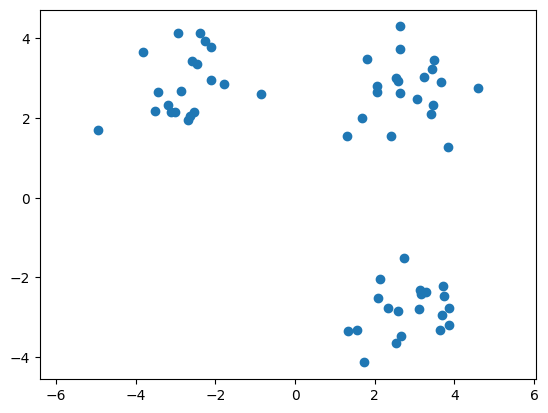

In [102]:
plt.scatter(X[0 , :] , X[1 , :])
plt.axis('equal')

## step 1 initailization

In [103]:
k = 3
d , n  = X.shape
ind = rng.choice(np.arange(n) , size = k , replace = False) 
#genrate k numbers without repitation


In [104]:
d , n  = X.shape
print(d , n)

2 60


In [105]:
ind

array([36, 45,  4])

In [106]:
print(X[:,36])
print(X[:,45])


[ 2.08054771 -2.50283926]
[3.66538511 2.90151452]


In [107]:
mus = X[: , ind] # means or centroid
mus

array([[ 2.08054771,  3.66538511, -3.01680116],
       [-2.50283926,  2.90151452,  2.14695607]])

In [108]:
mus.shape

(2, 3)

## step2 cluster assignment

In [109]:
z = np.zeros(n)
for i in range(n):
    dist = np.linalg.norm(mus-X[:,i].reshape(d,1),
    axis = 0)
    z[i] =  np.argmin(dist)

In [110]:
z

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

# updata cluster center

In [111]:
#
for j in range(k): # k = 3
    if np.any(z ==j):
        mus[:,j] = X[:,z==j].mean(axis = 1)

In [112]:
mus

array([[ 2.84056879,  2.82550766, -2.763167  ],
       [-2.8142141 ,  2.70919631,  2.83969701]])

## combined all

In [113]:
def k_means(X , k):
    d , n = X.shape
    # step1 Initialization
    ind = rng.choice(np.arange(n) , size = k , replace = False)
    mus = X[: , ind]
    
    z_prev = np.zeros(d) #keep trak of previous cluster assignment
    z = np.zeros(d) # new cluser assignment
    # convergence criterion 
    while not np.array_equal(z_prev , z):
        z_prev = z.copy()
        #step2 Cluster assignment 
        for i in range(n):
            dist = np.linalg.norm(mus - X[:,i].reshape(d,1),axis = 0)
            z[i] = np.argmin(dist)
        #step3 compute centers
        for j in range(k):
            if np.any(z==k):
                mus[: , j] = X[: , z ==k].mean(axis = 1)
    return z.astype(np.int8) , mus
        
        
    

In [114]:
z , mus = k_means(X , k)

ValueError: 'c' argument has 2 elements, which is inconsistent with 'x' and 'y' with size 60.

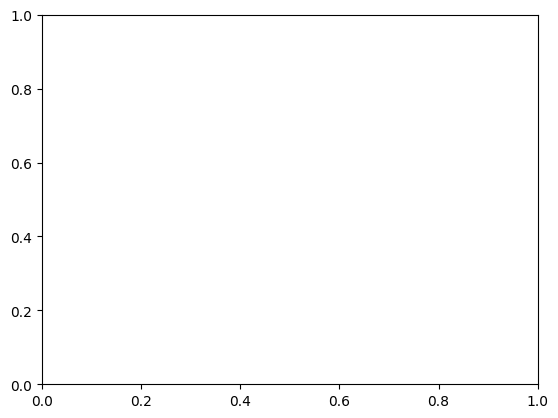

In [115]:
colors = np.array(['red','green','blue'])
plt.scatter(X[0, :] , X[1, :] , c = colors[z.astype(int)])
plt.show()